In [12]:
from pyexpat import features

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, date
import pandas as pd

In [13]:
ticker = "SPY" # S&P500
start_date = datetime(year=2015, month=1, day=1)
end_date = date.today().strftime("%Y-%m-%d")
data = yf.download(tickers= ticker,
                   start=start_date,
                   end=end_date,
                   auto_adjust=True,
                   progress=False,
                   interval="1d")

In [14]:
stock_data = pd.DataFrame(data)

stock_data['Next Close'] = stock_data['Close'].shift(-1)
stock_data.columns = stock_data.columns.get_level_values(0)
stock_data.head()


Price,Close,High,Low,Open,Volume,Next Close
Date,,,,,,
2015-01-02,170.589600,171.793694,169.551596,171.378492,121465900,167.508804
2015-01-05,167.508804,169.709366,167.201559,169.543288,169632600,165.931122
2015-01-06,165.931122,168.339285,165.133929,167.816127,209151400,167.998764
2015-01-07,167.998764,168.339232,166.811294,167.259706,125346700,170.979889
2015-01-08,170.979889,171.195802,169.393830,169.410429,147217800,169.609726


(array([100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

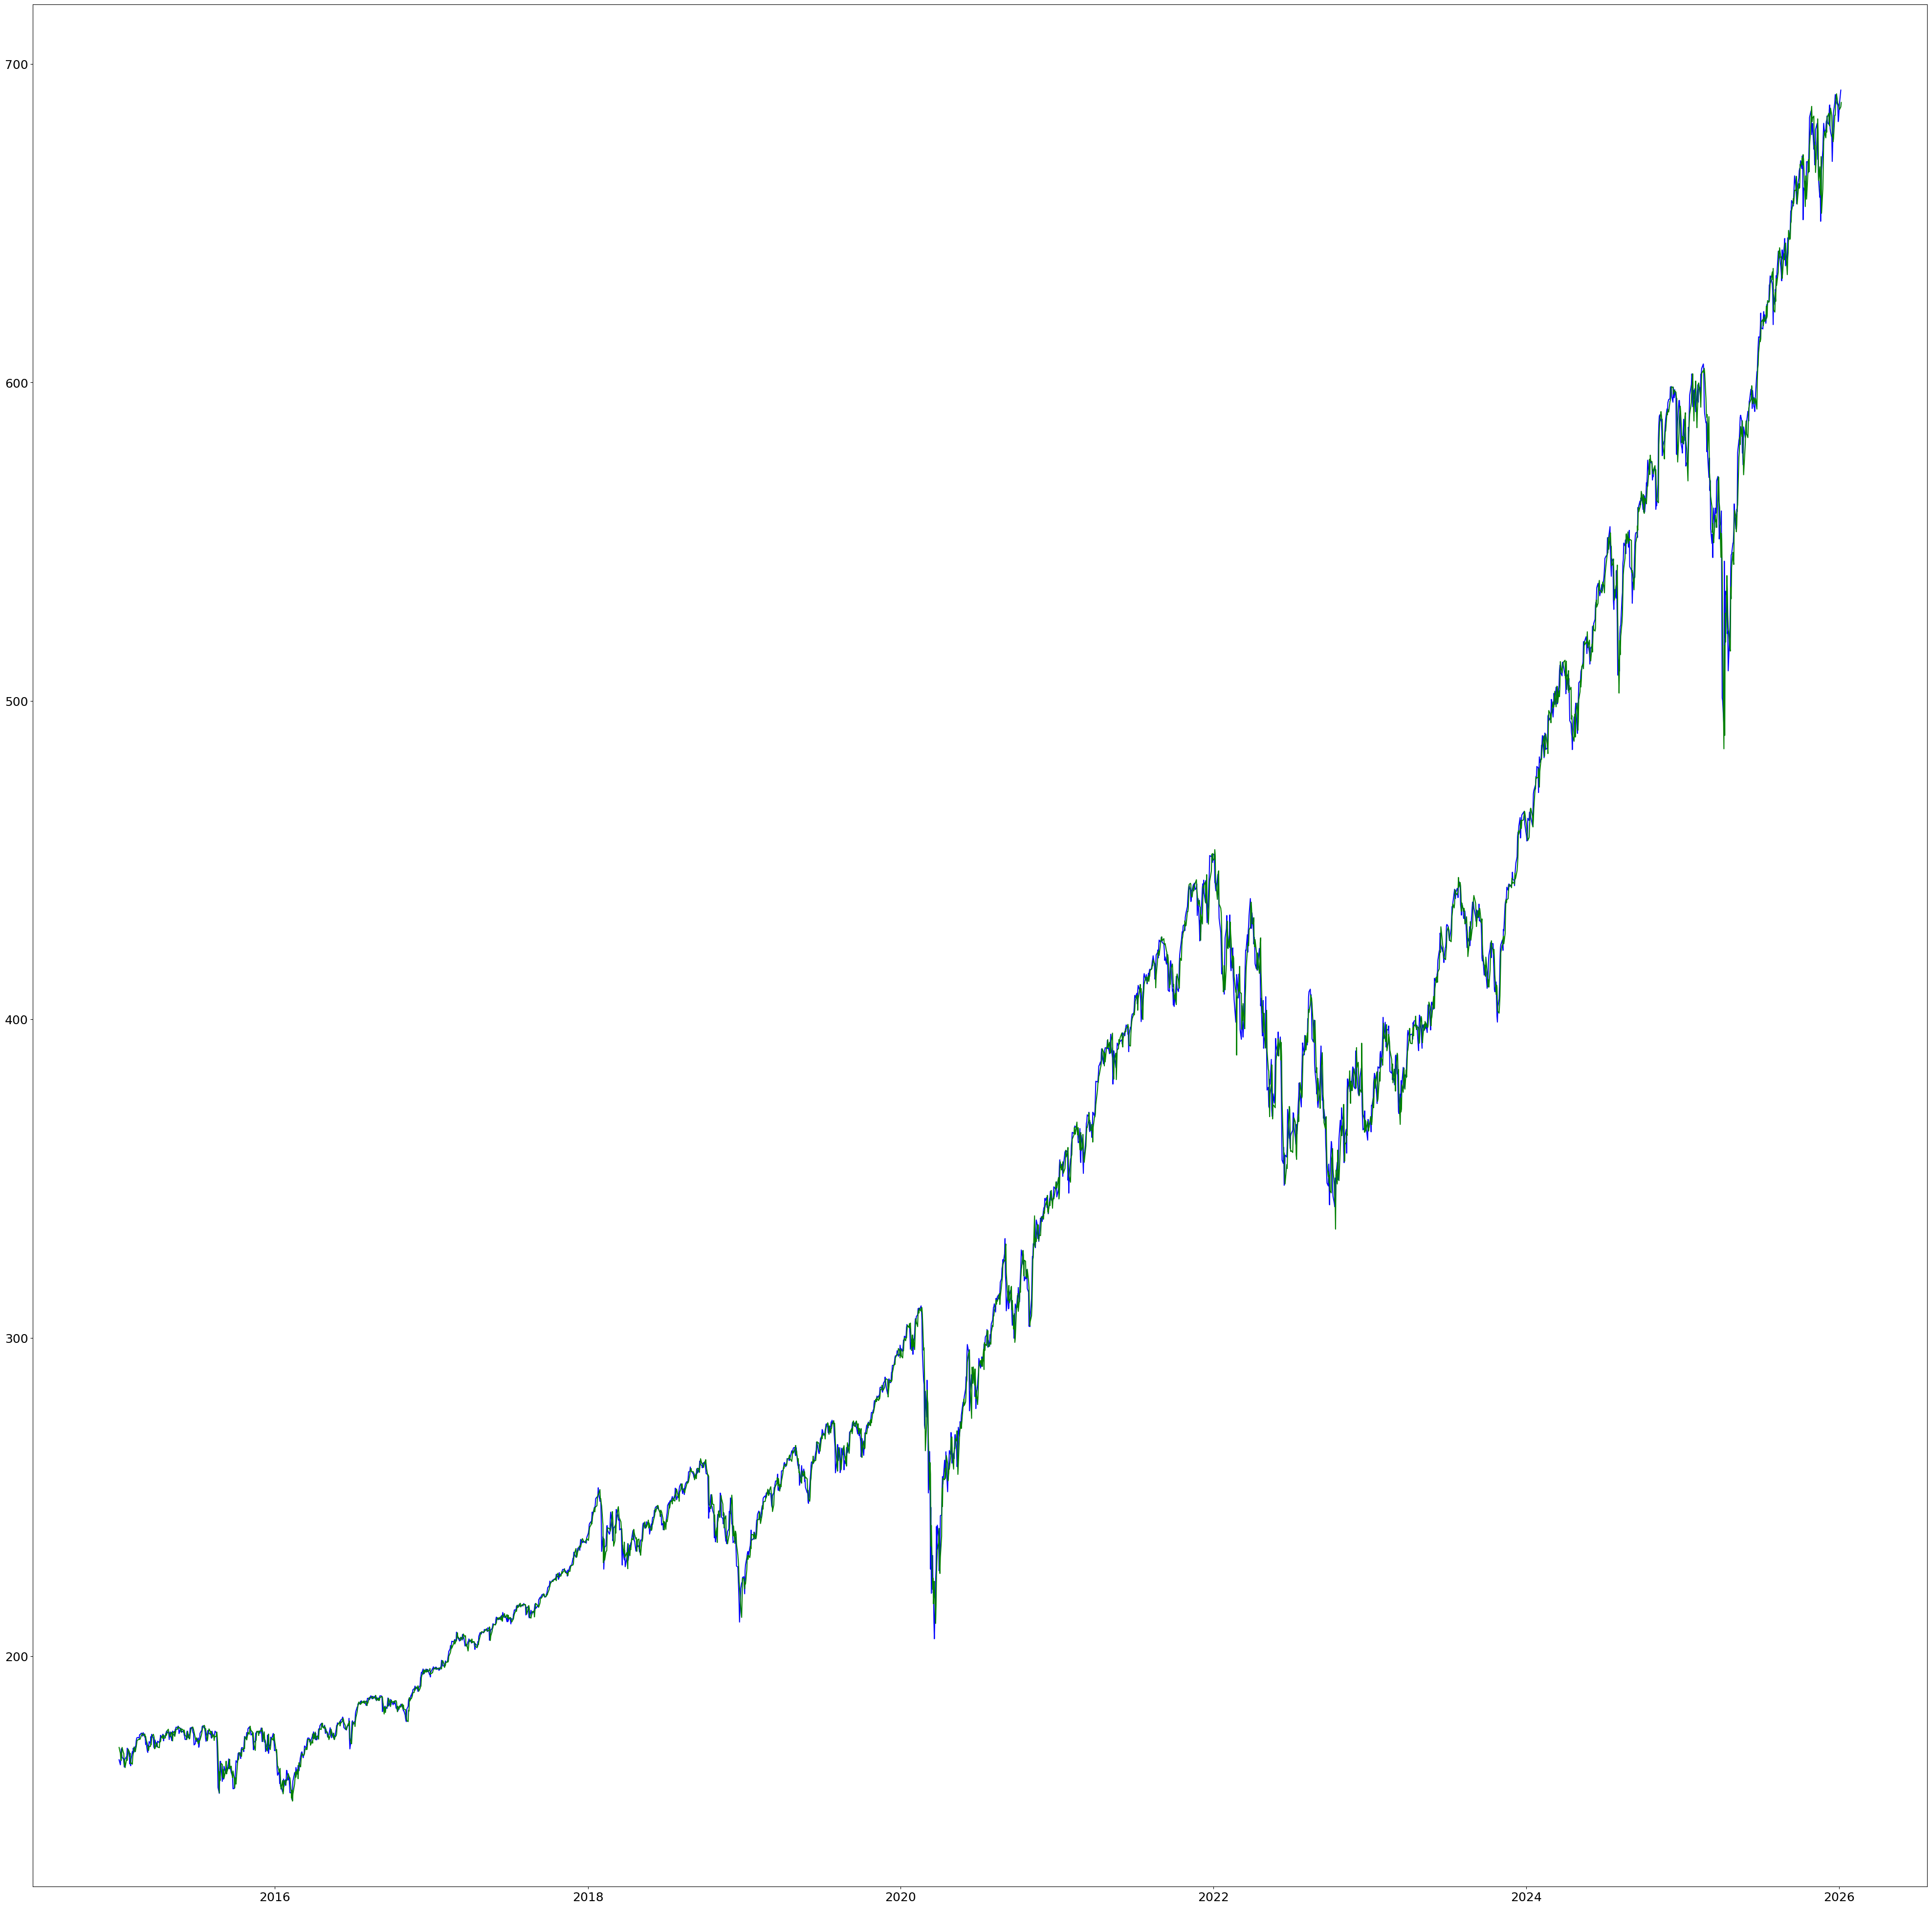

In [15]:
plt.figure(figsize=(50,50))
plt.plot(stock_data.index, stock_data['Next Close'], color='blue')
plt.plot(stock_data.index, stock_data['Open'], color='green')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18 )

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


LR_model = LogisticRegression()

stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

lagged_features = []
for f in ['Open', 'High', 'Low', 'Close', 'Volume']:
    name = f + '_Lag1'
    stock_data[name] = stock_data[f].shift(1) # shifting data to delete data leakage
    lagged_features.append(name)
    
stock_data.dropna(inplace=True)

X = stock_data[lagged_features]
y = stock_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

acc = accuracy_score(y_test, predictions)
print('accuracy=',round(acc*100, 2),'%')

accuracy= 54.69 %
